In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import mask_props,setup_cov,cf_to_pdf
import matplotlib.pyplot as plt 
import scipy.stats as stats
     


In [129]:
def gaussian_cf(t,mu,sigma):
    return np.exp(1j * t * mu - 0.5 * sigma**2 * t**2)



def nth_moment(n,t,cf):
    k = 5 # 5th degree spline
    derivs_at_zero = [1j * UnivariateSpline(t,cf.imag,k=k,s=0).derivative(n=i)(0) + UnivariateSpline(t,cf.real,k=k,s=0).derivative(n=i)(0)  for i in range(1,3)]
    return np.abs(1j ** -n * derivs_at_zero[n-1])

Loaded C_l with lmax = 30
summation over wigners for noise yields 0.00
1.8484089836104868e-06 1.848408857581411e-06 1.8484089070076218e-06
3.740110739319614e-12 3.740110348753644e-12 3.740136973649123e-12


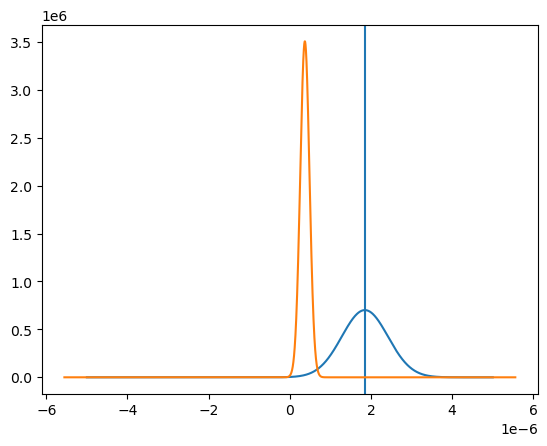

In [ ]:
nside = 256
lmax = 30
lmin = 0
kids55_cl = mask_props.TheoryCl(lmax,path='Cl_3x2pt_kids55.txt')
theta = 5
maskarea = 1000
fsky = maskarea/41253
binmin_in_arcmin = 120
binmax_in_arcmin = 180
mean, cov, cov_sn = setup_cov.cov_xi_gaussian(kids55_cl,fsky,binmin_in_arcmin,binmax_in_arcmin)
steps = 4096
xip_max = 5.0e-6
dt_xip = 0.45 * 2 * np.pi / xip_max

t0 = -0.1 * dt_xip * (steps - 1)
t = np.linspace(t0, -t0, steps - 1)
x = np.linspace(-xip_max,xip_max,steps)
cf = gaussian_cf(t,mean,np.sqrt(cov))
newx, convertedpdf = cf_to_pdf.cf_to_pdf_1d(cf, t0, dt_xip)
gausspdf = stats.norm.pdf(x,mean,np.sqrt(cov))
mean_from_cf = nth_moment(1,t,cf)
std_from_cf = nth_moment(2,t,cf)
mean_from_pdf = np.trapz(gausspdf*x,x=x)
std_from_pdf = np.trapz(gausspdf*x**2,x=x)
print(mean,mean_from_cf,mean_from_pdf)
print(mean**2 + cov,std_from_pdf,std_from_cf)

plt.figure()
plt.plot(x,gausspdf)
plt.axvline(mean_from_pdf)
plt.plot(newx,convertedpdf)
plt.show()